# Import packages

In [213]:
!pip install tqdm


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import trange

# Load the data

In [215]:
data = pd.read_csv("C:\\Users\\raghu\\Downloads\\heart.csv")

In [216]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Split the data into features and labels 

In [217]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


# Normalize the data 

In [218]:
mean = np.mean(x,axis=0)
std = np.std(x,axis=0)
x=(x-mean)/std

In [219]:
x.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-1.407015e-16,2.345026e-17,-7.035077e-16,-1.113887e-16,-2.345026e-17,1.465641e-16,-6.800574e-16,-4.690051e-17,2.345026e-17,-1.407015e-16,-2.345026e-17,-1.641518e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


# Define the MLP architecture

In [220]:
learning_rate= 0.1
epochs = 10

# Split the data into training and testing sets

In [221]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

# Activation function

In [222]:
class Sigmoid:
    
    def Sigmoid_fn(v: np.ndarray) -> np.ndarray:
        return 1. / ( 1. + np.exp(-v) )
    
    def Sigmoid_deriv_fn(y: np.ndarray) -> np.ndarray:
        y_temp = y.astype(float)
        return y_temp * (1 - y_temp)

# Design MLP

In [229]:
class MLP:
    
    def __init__(self,input_dim: int, hidden_dim: int, output_dim: int):
        
        self.input = input_dim #initialization
        self.hidden = hidden_dim
        self.output = output_dim
        
        #initialization of weights and bias
        
        self.weights_X_H = np.random.randn(self.input,self.hidden)
        self.weights_H_Y = np.random.randn(self.hidden,self.output)
        
        self.bias_X_H = np.random.random((1,self.hidden))
        self.bias_H_Y = np.random.random((1,self.output))
          
    def fn(self,D: np.ndarray, Y: np.ndarray): # loss function
        return 0.5 * np.sum(np.power(D - Y , 2))
    def deriv_fn(self,D: np.ndarray, Y: np.ndarray)->np.ndarray:
        return np.sum(D-Y)

    def train(self, X: np.ndarray, D: np.ndarray, val_X: np.ndarray = None, val_D: np.ndarray = None, epochs: int = 5):
        
        metrics = {
            "loss": [], 
            "accuracy": []
        }
        
        epoch_range = trange(epochs)
        batch_size = 1
        
        for _ in epoch_range:
            for i in range(0, X.shape[0], batch_size):
                
                x = X[i:i+batch_size]
                d = D[i:i+batch_size]
                
                # Feed forward
                y1, y2 = self.predict(x)
                
                # Backpropogation
                #print(d)
                output_error = self.deriv_fn(d, y2)
                output_delta = output_error * Sigmoid.deriv_fn(y2)
                # Above code should be v2 instead of y2 
                # but the code is changed in sigmoid function.
                #print(output_delta.shape,self.weights_H_Y.shape,y2.shape)
                hidden_error = output_delta.dot(self.weights_H_Y.T)
                hidden_delta = hidden_error * Sigmoid.deriv_fn(y1)
                
                delta_w_output = learning_rate * np.dot(y1.T, output_delta)
                delta_w_hidden = learning_rate * np.dot(x.T, hidden_delta)
                
                # Updating weights and bias
                self.weights_H_Y = self.weights_H_Y + delta_w_output
                self.weights_X_H = self.weights_X_H + delta_w_hidden

                self.bias_H_Y = self.bias_H_Y + np.sum(delta_w_output, axis = 0)
                self.bias_X_H = self.bias_X_H + np.sum(delta_w_hidden, axis = 0)
            
            if val_X is not None and val_D is not None:
                _, y_pred = self.predict(val_X)
                metrics['loss'].append(self.fn(val_D, y_pred.T[0]))
                metrics['accuracy'].append(MLP.accuracy(val_D, y_pred.T[0]))
       
        return metrics
        
    def accuracy(D: np.ndarray, Y: np.ndarray):
        Y_temp = (Y >= 0.5).astype(int)
        return np.sum(D == Y_temp) / D.shape[0]        
            
    def predict(self, X: np.ndarray):
        
        v1 = X.dot(self.weights_X_H) + self.bias_X_H
        y1 = Sigmoid.fn(v1)
        
        v2 = y1.dot(self.weights_H_Y) + self.bias_H_Y
        y2 = Sigmoid.fn(v2)
        
        return [y1, y2]
        

In [230]:
input = x.shape[1]
output = 1
x.shape

(303, 13)

In [238]:
model = MLP(input,2,output)
metrics = model.train(x_train, y_train, x_test, y_test, 100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 53.80it/s]


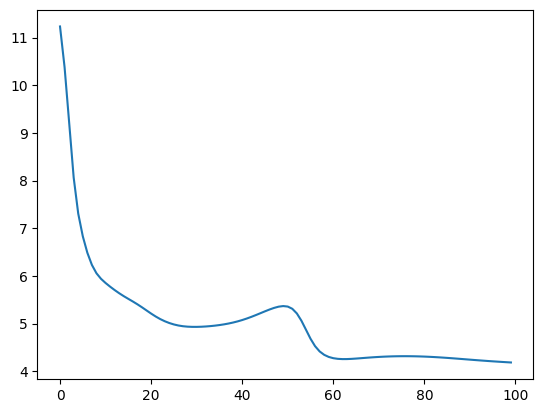

In [239]:
plt.plot(metrics['loss'])
plt.show()

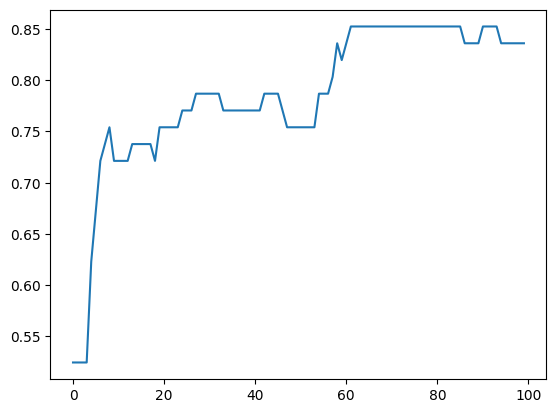

In [240]:
plt.plot(metrics['accuracy'])
plt.show()

In [244]:
y_pred = model.predict(x_test)

print(y_test)
print(y_pred[-1].T[0])

print(MLP.accuracy(y_test, y_pred[-1].T[0]))

[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
[0.09910568 0.84062309 0.70314789 0.06182713 0.72487062 0.99486603
 0.66939036 0.06138322 0.06165114 0.25705617 0.97589497 0.06207812
 0.99673763 0.0665908  0.99700965 0.99694704 0.99699954 0.07392867
 0.061576   0.06214729 0.46852182 0.06360101 0.27040994 0.62419483
 0.99658975 0.93219181 0.99415034 0.61022468 0.06188769 0.99687993
 0.06950824 0.06556268 0.06184941 0.08227903 0.61698116 0.06592696
 0.7207364  0.71244413 0.75496345 0.99607848 0.47670976 0.70389754
 0.7180819  0.9790009  0.98123    0.06216399 0.89271494 0.99682603
 0.09079588 0.06209785 0.14833919 0.0616162  0.99678902 0.99685903
 0.11117346 0.06137845 0.0630128  0.9969507  0.06312379 0.06142105
 0.06271223]
0.8360655737704918
